# Recreate random forests

Preliminary results seemed too good to be true. This notebook contains a better method that hopefully provides a better picture on why the results were what they were.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [49]:
def classify(CSV):
    print('File:', CSV)
    df = pd.read_csv(CSV).drop_duplicates()
    columns = list(df.columns)[list(df.columns).index('Exp_response') + 1:]
    print('Predicting:', columns)
    
    X = df[['WCPM', 'Acc', 'Comp', 'Exp', 'level', 'WCPM_response', 'Comp_response', 'Exp_response']]
    Y = df[columns]
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=30, random_state=0)
    
    label_frequencies = []
    accuracies = []
    for column in columns:
        label_frequencies.append(Y[column].sum())
        y_train = Y_train[column]
        y_test = Y_test[column]
        
        clf = RandomForestClassifier()
        clf.fit(X_train, y_train)
        
        accuracy = clf.score(X_test, y_test)
        accuracies.append(accuracy)
    
    return {
        'columns': columns,
        'accuracies': accuracies,
        'label_frequencies': label_frequencies
    }

In [50]:
annotation_categories = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
category_desc = 'hiFrq	GradeLev	Applies	GradeCVe	Affixes	MultiSyl	Substit	Omit	Insert	Reverse	Rate	Rhythm	F-zero	Punctuation	FS&word	Line	Long	easyHard	Effort	Assisted'.split('\t')
category_to_desc = {str(idx + 1): x for idx, x in enumerate(category_desc)}

File: ../predicting-annotation-fields/1_table.csv
Predicting: ['undetermined', '1_or_2', '2_unanimous', '2_or_3', '3_unanimous']


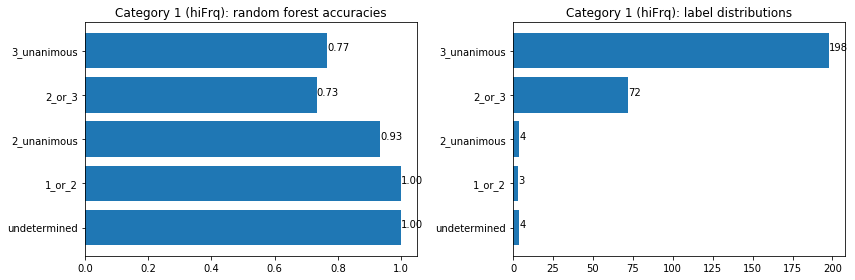

File: ../predicting-annotation-fields/2_table.csv
Predicting: ['undetermined', '1_or_2', '2_unanimous', '2_or_3', '3_unanimous']


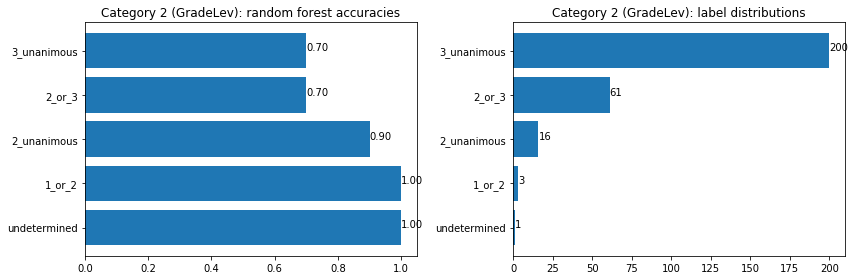

File: ../predicting-annotation-fields/3_table.csv
Predicting: ['undetermined', '1_or_2', '2_unanimous', '2_or_3', '3_unanimous']


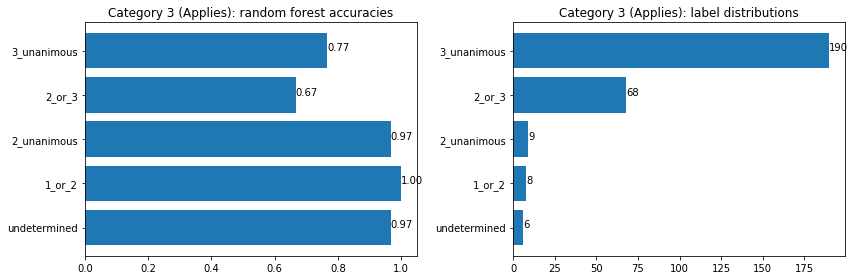

File: ../predicting-annotation-fields/4_table.csv
Predicting: ['undetermined', '1_unanimous', '1_or_2', '2_unanimous', '2_or_3', '3_unanimous']


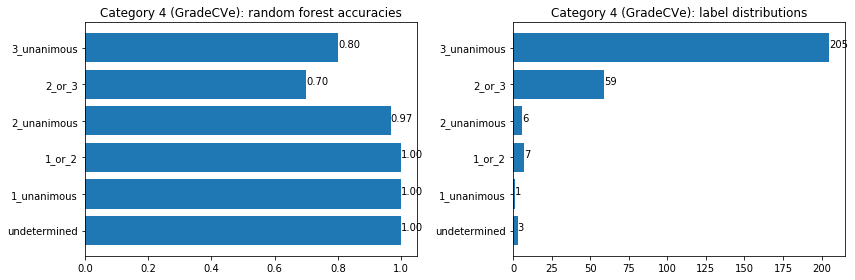

File: ../predicting-annotation-fields/5_table.csv
Predicting: ['undetermined', '1_unanimous', '1_or_2', '2_unanimous', '2_or_3', '3_unanimous']


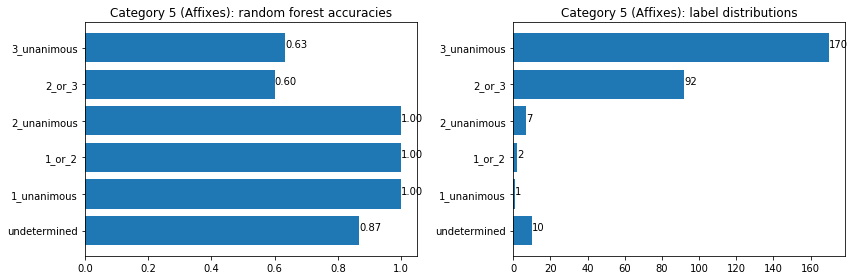

File: ../predicting-annotation-fields/6_table.csv
Predicting: ['undetermined', '1_or_2', '2_unanimous', '2_or_3', '3_unanimous']


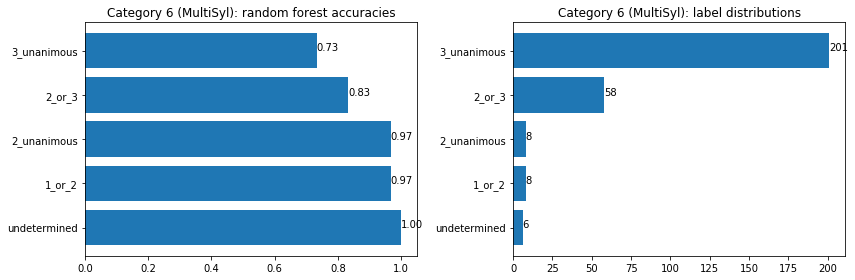

File: ../predicting-annotation-fields/7_table.csv
Predicting: ['1_unanimous', '1_or_2', '2_unanimous']


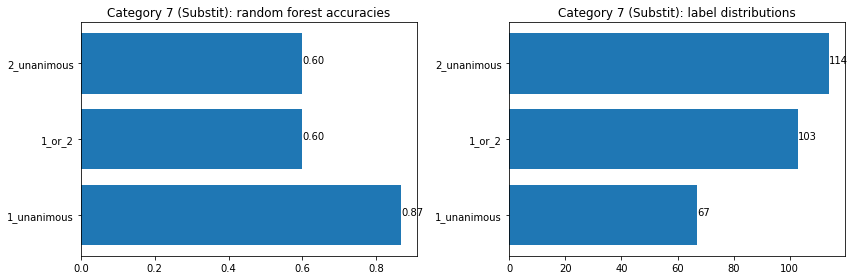

File: ../predicting-annotation-fields/8_table.csv
Predicting: ['1_unanimous', '1_or_2', '2_unanimous']


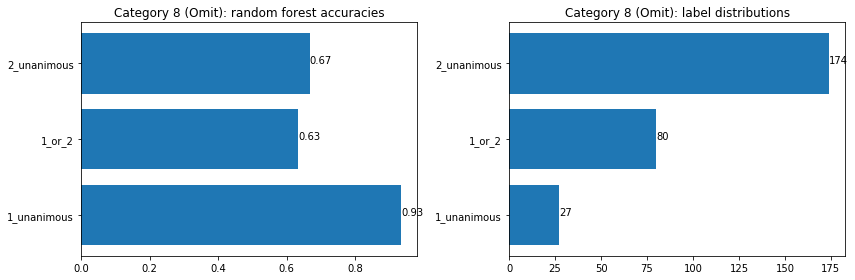

File: ../predicting-annotation-fields/9_table.csv
Predicting: ['1_unanimous', '1_or_2', '2_unanimous']


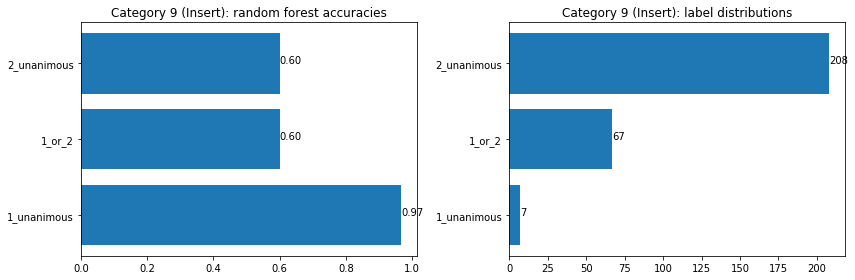

File: ../predicting-annotation-fields/10_table.csv
Predicting: ['1_or_2', '2_unanimous']


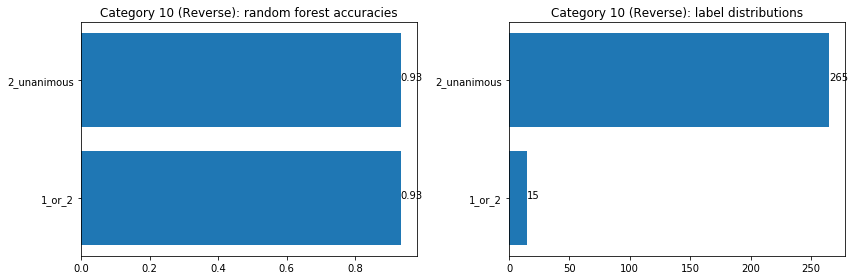

File: ../predicting-annotation-fields/11_table.csv
Predicting: ['undetermined', '1_unanimous', '1_or_2', '2_unanimous', '2_or_3', '3_unanimous']


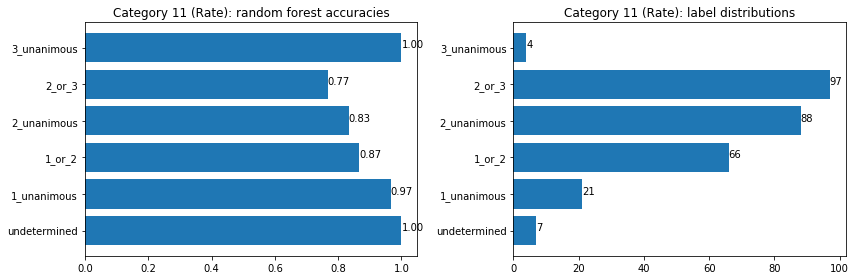

File: ../predicting-annotation-fields/12_table.csv
Predicting: ['undetermined', '1_unanimous', '1_or_2', '2_unanimous', '2_or_3', '3_unanimous']


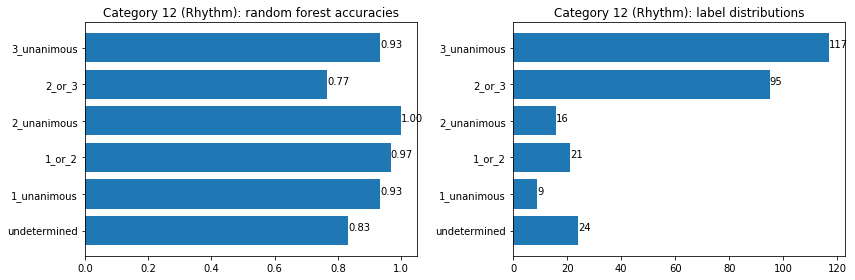

File: ../predicting-annotation-fields/13_table.csv
Predicting: ['undetermined', '1_or_2', '2_unanimous', '2_or_3', '3_unanimous']


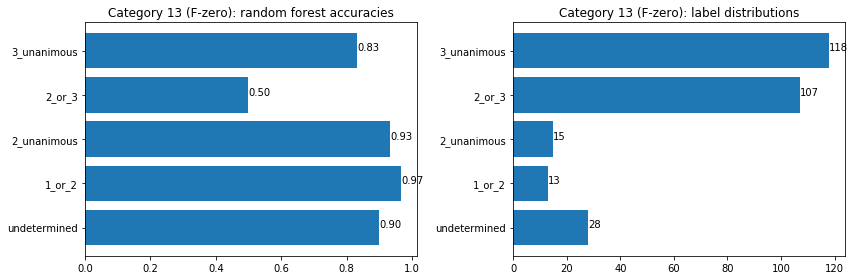

File: ../predicting-annotation-fields/14_table.csv
Predicting: ['undetermined', '1_or_2', '2_unanimous', '2_or_3', '3_unanimous']


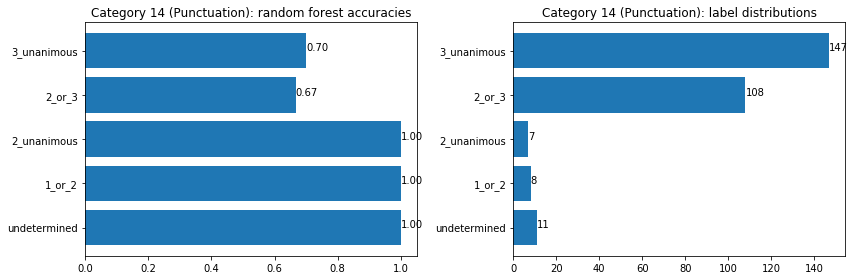

File: ../predicting-annotation-fields/15_table.csv
Predicting: ['undetermined', '1_unanimous', '1_or_2', '2_unanimous', '2_or_3', '3_unanimous']


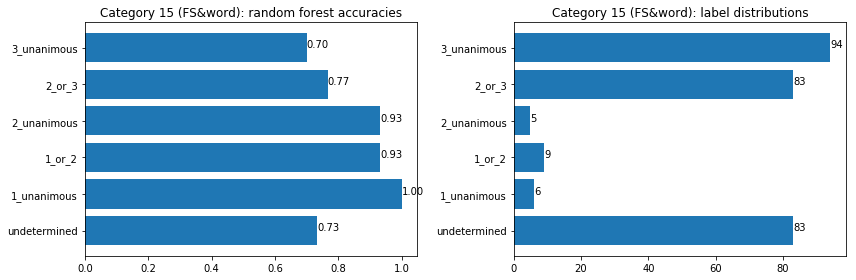

File: ../predicting-annotation-fields/16_table.csv
Predicting: ['undetermined', '1_unanimous', '2_unanimous', '2_or_3', '3_unanimous']


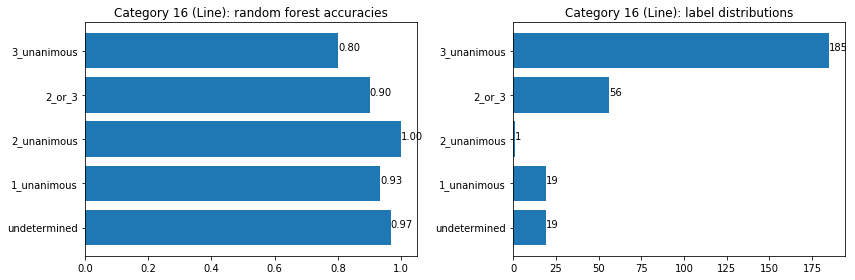

File: ../predicting-annotation-fields/17_table.csv
Predicting: ['undetermined', '1_unanimous', '1_or_2', '2_unanimous', '2_or_3', '3_unanimous']


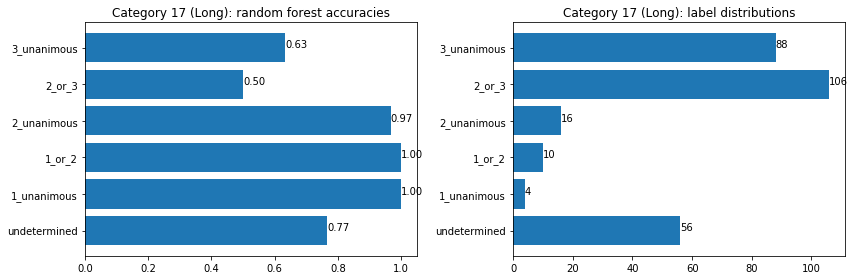

File: ../predicting-annotation-fields/18_table.csv
Predicting: ['undetermined', '1_unanimous', '1_or_2', '2_unanimous', '2_or_3', '3_unanimous']


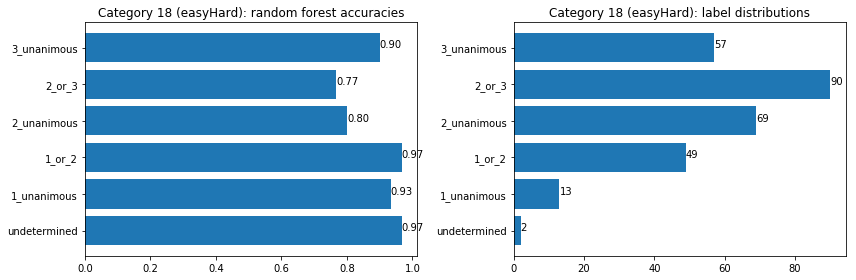

File: ../predicting-annotation-fields/19_table.csv
Predicting: ['1_unanimous', '1_or_2', '2_unanimous']


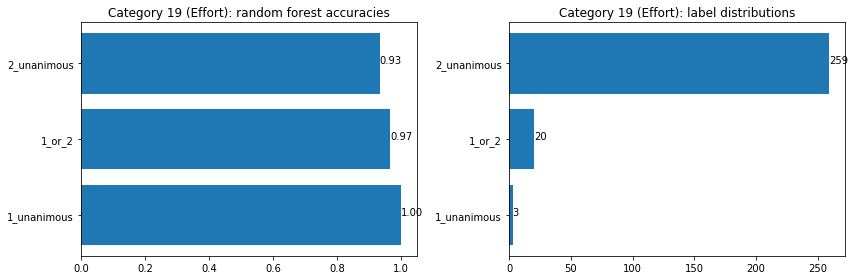

File: ../predicting-annotation-fields/20_table.csv
Predicting: ['undetermined', '1_unanimous', '1_or_2', '2_unanimous', '2_or_3', '3_unanimous']


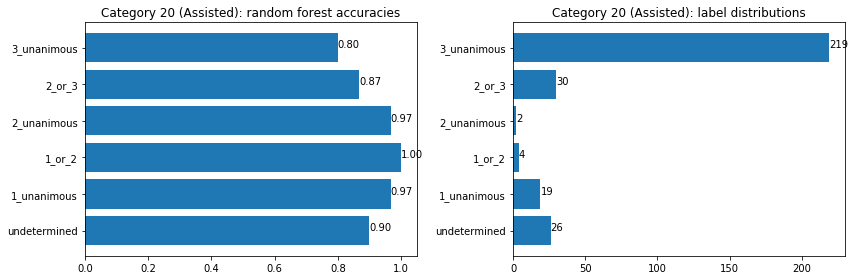

In [55]:
for i in range(1, 21):
    CSV = '../predicting-annotation-fields/{}_table.csv'.format(i)
    classifier_results = classify(CSV)
    
    columns = classifier_results['columns']
    accuracies = classifier_results['accuracies']
    label_frequencies = classifier_results['label_frequencies']
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    title = 'Category {} ({}):'.format(i, category_to_desc[str(i)])
    ax1.set_title(title + ' random forest accuracies')
    ax2.set_title(title + ' label distributions')
    ax1.barh(columns, accuracies)
    ax2.barh(columns, label_frequencies)
    
    for index, value in enumerate(accuracies):
        ax1.text(value, index, '{:.2f}'.format(value))
    for index, value in enumerate(label_frequencies):
        ax2.text(value, index, str(value))
    
    fig.tight_layout()
    plt.show()